In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255

In [3]:
# 이산 푸리에 변환 -> 이미지를 공간 도메인에서 주파수 도메인으로 변환
fft = cv2.dft(image,flags=cv2.DFT_COMPLEX_OUTPUT)

In [4]:
# 낮은 주파수가 배열의 중아엥 위치하도록 이산 푸리에 변환의 결과를 이동
fft_shift = np.fft.fftshift(fft, axes=[0, 1])

In [6]:
# 고주파의 진폭을 0 으로 설정
sz = 25
mask = np.zeros(fft.shape, np.uint8)
mask[image.shape[0]//2-sz:image.shape[0]//2+sz,image.shape[1]//2-sz:image.shape[1]//2+sz, :] = 1
fft_shift *= 1-mask

In [10]:
fft.shape

(512, 512, 2)

In [11]:
mask.shape

(512, 512, 2)

In [7]:
#  이산푸리에 결과를 다시 이동
fft = np.fft.ifftshift(fft_shift,axes=[0,1])

In [12]:
filtered = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

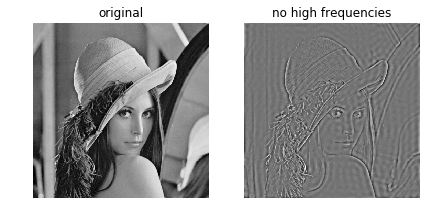

In [13]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('no high frequencies')
plt.imshow(filtered, cmap='gray')
plt.tight_layout(True)
plt.show()

In [14]:
cv2.imshow('filtered', filtered)
cv2.waitKey()
cv2.destroyAllWindows()

<img src="./filtered.png">